In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

data = pd.read_csv("heart.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    object 
 4   chol        294 non-null    object 
 5   fbs         294 non-null    object 
 6   restecg     294 non-null    object 
 7   thalach     294 non-null    object 
 8   exang       294 non-null    object 
 9   oldpeak     294 non-null    float64
 10  slope       294 non-null    object 
 11  ca          294 non-null    object 
 12  thal        294 non-null    object 
 13  num         294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [4]:
class Unique_values:
    def __init__(self,data) -> None:
        self.data = data

    def check_uniqe(self, column_name):
        return self.data[column_name].value_counts(sort = True, ascending = True)

    def plottin(self, column_name):
        plt.figure(figsize=(10,5))
        plt.title(column_name)
        plt.bar(self.check_uniqe(column_name).index, self.check_uniqe(column_name).values)
        plt.legend(self.check_uniqe(column_name).index)
        plt.grid()
        return plt.show()

In [5]:
def check_question_mark(dane):
    messy_columns = []
    columns = dane.columns
    for c in columns:
        if "?" in dane[c].unique():
            messy_columns.append(c)
    return messy_columns

In [7]:
def percent_question(d):
    messy_columns = []
    columns = d.columns
    for c in columns:
        if "?" in d[c].unique():
            count_question = np.count_nonzero(d[c].values == "?")
            d_shape = data.shape[0]
            print(c, round((count_question / d_shape),4))
    return "all"

In [8]:
print(percent_question(data))

trestbps 0.0034
chol 0.0782
fbs 0.0272
restecg 0.0034
thalach 0.0034
exang 0.0034
slope 0.6463
ca 0.9898
thal 0.9048
all


C:\Users\Bartek\AppData\Local\Temp/ipykernel_8484/791708815.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if "?" in d[c].unique():


In [9]:
#drop columns with more than 50% of messy data
new_data = data.drop(["slope", "ca", "thal"], axis=1)

In [10]:
print(percent_question(new_data))

trestbps 0.0034
chol 0.0782
fbs 0.0272
restecg 0.0034
thalach 0.0034
exang 0.0034
all


C:\Users\Bartek\AppData\Local\Temp/ipykernel_8484/791708815.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if "?" in d[c].unique():


In [12]:
def numeric(d):
    col = d.columns
    for nd in col:
        avg = pd.to_numeric(d[d[nd] != "?"].loc[:,nd]).mean()
        mod = pd.to_numeric(d[d[nd] != "?"].loc[:,nd]).mode()[0]
        med = pd.to_numeric(d[d[nd] != "?"].loc[:,nd]).median()        
        print(f"{nd.capitalize()}, Mean = {round(avg, 3)}, Mode = {mod}, Median = {med}.")
    return " "

In [13]:
#change ? values. For columns with mode equal 0 change to mode. For columns different than 0 - median
numeric(new_data[check_question_mark(new_data)])


Trestbps, Mean = 132.584, Mode = 120, Median = 130.0.
Chol, Mean = 250.849, Mode = 230, Median = 243.0.
Fbs, Mean = 0.07, Mode = 0, Median = 0.0.
Restecg, Mean = 0.218, Mode = 0, Median = 0.0.
Thalach, Mean = 139.13, Mode = 150, Median = 140.0.
Exang, Mean = 0.304, Mode = 0, Median = 0.0.


C:\Users\Bartek\AppData\Local\Temp/ipykernel_8484/12377691.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if "?" in dane[c].unique():


' '

In [14]:
new_data.loc[new_data.trestbps == "?", "trestbps"] = pd.to_numeric(new_data.loc[new_data.trestbps != "?", "trestbps"]).median()
new_data.loc[new_data.chol == "?", "chol"] = pd.to_numeric(new_data.loc[new_data.chol != "?", "chol"]).median()
new_data.loc[new_data.fbs == "?", "fbs"] = pd.to_numeric(new_data.loc[new_data.fbs != "?", "fbs"]).mode()[0]
new_data.loc[new_data.restecg == "?", "restecg"] = pd.to_numeric(new_data.loc[new_data.restecg != "?", "restecg"]).mode()[0]
new_data.loc[new_data.thalach == "?", "thalach"] = pd.to_numeric(new_data.loc[new_data.thalach != "?", "thalach"]).median()
new_data.loc[new_data.exang == "?", "exang"] = pd.to_numeric(new_data.loc[new_data.exang != "?", "exang"]).mode()[0]

In [15]:
check_question_mark(new_data)

C:\Users\Bartek\AppData\Local\Temp/ipykernel_8484/12377691.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if "?" in dane[c].unique():


[]

In [16]:
df = new_data.astype("int32")

In [17]:
pickled_data = "pickled_table.pkl"

In [18]:
with open(pickled_data, "wb") as file:
    pickle.dump(df, file)

In [19]:
round(df.groupby(df.columns[-1]).mean(),2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak
num,,,,,,,,,,
0,46.89,0.63,2.62,130.73,240.24,0.04,0.23,144.98,0.10,0.20
1,49.48,0.89,3.63,135.85,267.95,0.12,0.20,128.76,0.66,1.17


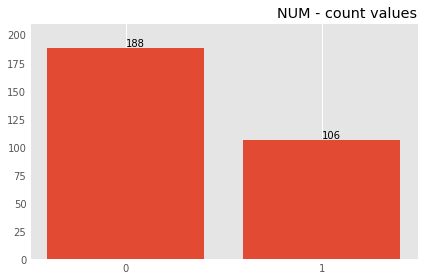

In [75]:
plottin = df[df.columns[-1]].value_counts()
plt.style.use("ggplot")
plt.bar(plottin.index, plottin.values)
plt.title("NUM - count values", loc="right")
plt.xticks(plottin.index, plottin.index)
for i, j in enumerate(plottin.values):
    plt.text(i, j + 2, j)
plt.grid(axis="y")
plt.ylim(0, 210)
plt.tight_layout()
plt.show()

In [135]:
def bins_selection(col, num_bins = 10):
    bins = []
    first_add = 0
    for _ in range(num_bins + 1):
        min_value = min(col)
        bins.append(min_value + first_add)
        first_add += int(round((max(col) - min(col)) / num_bins, 0))
    return bins

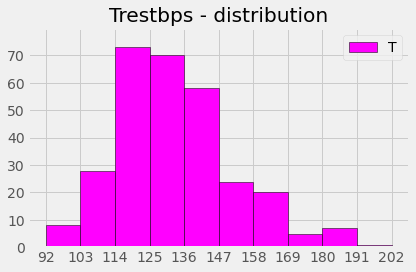

In [177]:
bins = bins_selection(df.trestbps)

plt.style.use("fivethirtyeight")

plt.hist(df.trestbps,cumulative=False, color="magenta", bins = bins, edgecolor = "black")
plt.title(f"{df.trestbps.name.capitalize()} - distribution")
plt.xticks(bins)
plt.yticks(np.arange(0,80,10))
plt.ylim(0, 80)
plt.legend(f"{df.trestbps.name.capitalize()}")
plt.tight_layout()
plt.show()

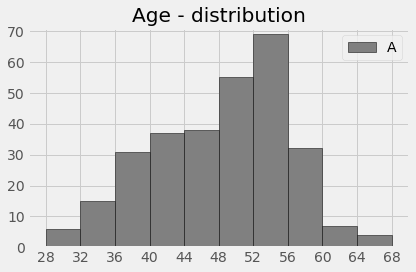

In [199]:
bins = bins_selection(df.age)

plt.style.use("fivethirtyeight")

plt.hist(df.age,cumulative=False, color="grey", bins = bins, edgecolor = "black")
plt.title(f"{df.age.name.capitalize()} - distribution")
plt.xticks(bins)
plt.yticks(np.arange(0,max(df.age.value_counts().sort_values().index + 5),10))
plt.ylim(0, max(df.age.value_counts().sort_values().index + 5))
plt.legend(f"{df.age.name.capitalize()}")
plt.tight_layout()
plt.show()

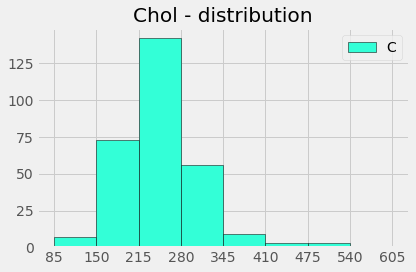

In [286]:
bins = bins_selection(df.chol,num_bins=8)

plt.style.use("fivethirtyeight")

plt.hist(df.chol,cumulative=False, color="#33FFD7", bins = bins, edgecolor = "black")
plt.title(f"{df.chol.name.capitalize()} - distribution")
plt.xticks(bins)
# plt.yticks(np.arange(0,max(df.chol.value_counts().sort_values().index + 5),10))
# plt.ylim(0, max(df.chol.value_counts().sort_values().index + 5))
plt.legend(f"{df.chol.name.capitalize()}")
plt.tight_layout()
plt.show()

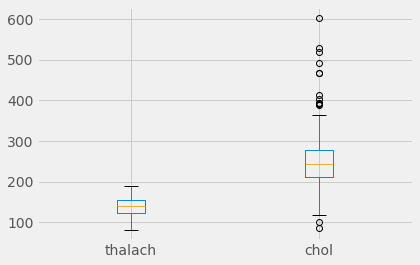

In [283]:
df.boxplot(column=["thalach", "chol"])
plt.show()

In [293]:
df.loc[df.chol > df.chol.quantile(.95), "chol"].sort_values()


236    355
58     358
155    365
273    388
228    392
292    393
158    394
263    404
70     412
197    466
131    468
281    491
265    518
225    529
243    603
Name: chol, dtype: int32

In [292]:
df.loc[df.loc[df.chol > df.chol.quantile(.95), "chol"].sort_values().index]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
236,48,1,4,160,355,0,0,99,1,2,1
58,42,1,4,140,358,0,0,170,0,0,0
155,54,1,4,150,365,0,1,134,0,1,0
273,56,1,4,170,388,0,1,122,1,2,1
228,40,0,4,150,392,0,0,130,0,2,1
292,58,0,2,180,393,0,0,110,1,1,1
158,55,0,2,130,394,0,2,150,0,0,0
263,52,1,4,140,404,0,0,124,1,2,1
70,44,1,4,150,412,0,0,170,0,0,0
197,40,1,4,120,466,0,0,152,1,1,1


In [202]:
import seaborn as sns

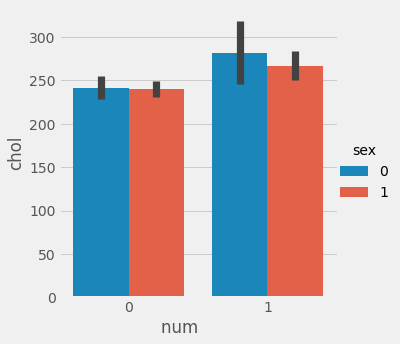

In [259]:
from statistics import median


sns.catplot(x="num       ", y='chol', data = df, hue='sex', kind="bar")
plt.show()

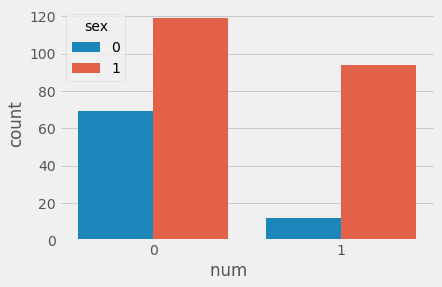

In [258]:
sns.countplot(x = "num       ", data = df, hue= "sex")
plt.show()

In [252]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0,0
1,29,1,2,120,243,0,0,160,0,0,0
2,29,1,2,140,243,0,0,170,0,0,0
3,30,0,1,170,237,0,1,170,0,0,0
4,31,0,2,100,219,0,1,150,0,0,0
